# Computational Challenge #4 - Group 1

In this challenge you will implement stochastic simulations of two synthetic biological circuits. The synthetic genetic switch, and the repressilator were described in two back–to–back papers in Nature in 2000. Please follow the link on the website to the two papers.

In this challenge two groups will report on the deterministic version of models of these circuits, while the other two will report on the stochastic versions. The last part of each question asks that you compare the results of the simulations. Therefore groups 1 and 2, and groups 3 and 4 will need to work together on each project.

You will analyze the deterministic version of the genetic switch system described in section III of the paper by Loinger, et al. (the one discussing the stochastic genetic switch). The differential equation is given in Eq. (9).

- Construct a Petri net representation of the system based on the description in the text (you can also consider the master equation given in the same section). How does the ODE relate to this representation? Why is this called an exclusive switch?
- Solve the ODE numerically and show the different trajectories in the phase plane. Coordinate with Group 2 on the parameters – use the ones in the paper. The nullclines are the solution to the equations $A' = 0$ and $B' = 0$. As discussed in the paper by Gardner, et al. they determine the behavior of the deterministic system (See Fig. 2). Perform the equivalent analysis for the system in Eq. (9).


In [1]:
# Import the necessary packages.
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

Define a function that defines the ODE system.

In [29]:
def ode_system(X, t=0):
    """ The rate equations that describe the BRD switch """
    # here X[0] = [A] and x[1] = [B]   
    # g is production rate and d is degradation rate.
    A = X[0]
    B = X[1]
    A_prime = g/(1+k*B/(1+k*A))-d*A
    B_prime = g/(1+k*A/(1+k*B))-d*B
    return np.array([A_prime,B_prime])

Let's now solve the system numerically for three different initial conditions and see if we indeed converge to the correct fixed point.

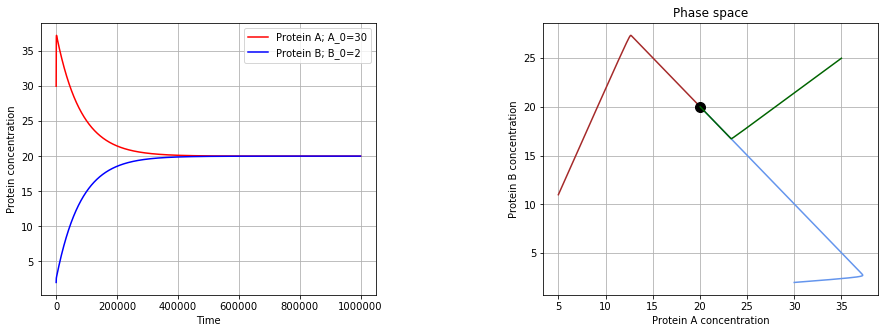

In [37]:
# Define system parameters.
alpha0=0.2
alpha1=0.01
k=alpha0/alpha1
g=0.2
d=0.005

# generate 1000 linearly spaced numbers for time axis
t = np.linspace(0, 1000000,  1000000)

# Choose initial values for A and B.
A_0 = 30; B_0 = 2;
initial_cond = np.array([A_0, B_0])

# type "help(integrate.odeint)" if you want more information about integrate.odeint inputs and outputs.
X, infodict = integrate.odeint(ode_system, initial_cond, t, full_output=True)

# Get time series for A, B.
A,B = X.T

#plot
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(A, 'r-', label='Protein A; A_0={}'.format(A_0))
ax1.plot(B, 'b-', label='Protein B; B_0={}'.format(B_0))
ax1.set_ylabel("Protein concentration")
ax1.set_xlabel("Time")
ax1.grid()
ax1.legend(loc='best')

ax2.plot(A, B, color="cornflowerblue")
ax2.set_xlabel("Protein A concentration")
ax2.set_ylabel("Protein B concentration")
ax2.set_title("Phase space")
ax2.grid()

# Get another trajectory to plot in phase plane.
# Choose initial values for A and B.
A_0 = 5; B_0 = 11;
initial_cond = np.array([A_0, B_0])

# type "help(integrate.odeint)" if you want more information about integrate.odeint inputs and outputs.
X, infodict = integrate.odeint(ode_system, initial_cond, t, full_output=True)

# Get time series for A, B.
A,B = X.T

# Plot new trajectory
ax2.plot(A, B, color="brown")


# Plot stable fixed point.
ax2.plot(A[-1], B[-1], marker='o',color="black",markersize=10)

# Get another trajectory to plot in phase plane.
# Choose initial values for A and B.
A_0 = 35; B_0 = 25;
initial_cond = np.array([A_0, B_0])

# type "help(integrate.odeint)" if you want more information about integrate.odeint inputs and outputs.
X, infodict = integrate.odeint(ode_system, initial_cond, t, full_output=True)

# Get time series for A, B.
A,B = X.T

# Plot new trajectory
ax2.plot(A, B, color="darkgreen")


The system converge to the positive symmetrical solution where $A=B$.

Let's now solve for the steady state solution directly and look at the vector field.

In [38]:
import sympy as sm
# define the Chemical reaction system 
# to avoid interference x = r (for resource) and y = c (for consumer) 
r, c = sm.symbols('r, c', negative=False)
R = g/(1+k*c/(1+k*r))-d*r
C = g/(1+k*r/(1+k*c))-d*c

# use sympy's way of setting equations to zero
REqual = sm.Eq(R, 0)
CEqual = sm.Eq(C, 0)

# compute fixed points
equilibria = np.array([sm.solve( (REqual, CEqual), r, c )]).squeeze()
print(equilibria)

[20.0249377333062 20.0249377333062]


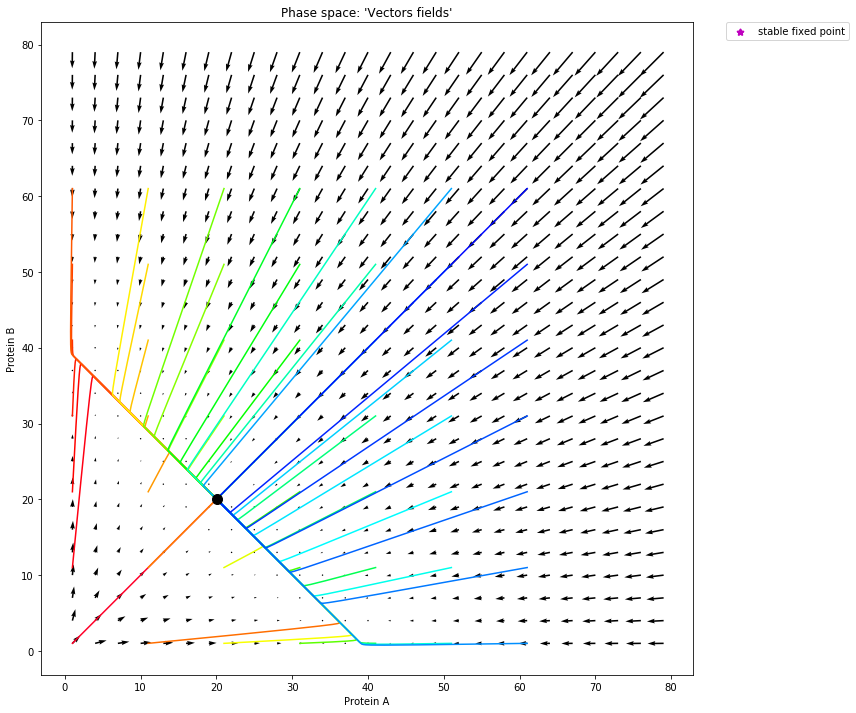

In [39]:
x = np.arange(1,80,3)
y = np.arange(1,80,3)
X,Y = np.meshgrid(x,y)
k = 20
u = g/(1+k*Y/(1+k*X))-d*X 
v = g/(1+k*X/(1+k*Y))-d*Y

fig, ax = plt.subplots(figsize=(12,12))
ax.quiver(X,Y,u,v,scale=None, scale_units='inches')
# initial values: A0 = 30, B0 = 80
x0 = np.arange(1,80,10)
y0 = x0
color=iter(cm.gist_rainbow(np.linspace(0,1,len(x0)*len(y0))))
for i in range(len(x0)-1):
    for j in range(len(y0)-1):
        Z, infodict = integrate.odeint(Sys, [x0[i],y0[j]], t, full_output=True) #solve ode using scipy integrate
        A, B = Z.T
        c_now = next(color)
        ax.plot(A, B, color = c_now)
ax.scatter(((k*g-d)+np.sqrt(np.power(k*g+d,2)+4*k*g*d))/(4*k*d), ((k*g-d)+np.sqrt(np.power(k*g+d,2)+4*k*g*d))/(4*k*d), marker='*', color='m',linewidth=2, label='stable fixed point')
ax.set_aspect('equal')
ax.set_xlabel("Protein A")
ax.set_ylabel("Protein B")  
ax.set_title("Phase space: 'Vectors fields'")

ax.plot(equilibria[0],equilibria[1],'k',marker='o',markersize=10)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

plt.show()

Let's plot the nullclines.

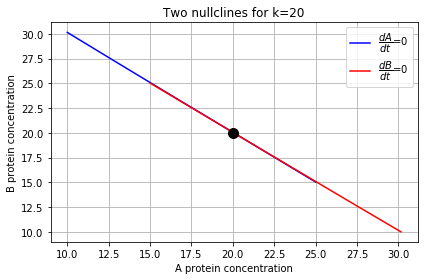

In [47]:
# Plotting the nullclines
k=20
fig3, ax3 = plt.subplots(1, 1)
A = np.linspace(10, 25,  1000)
B = np.linspace(10, 25,  1000)
dA_0 = (g+(k*g-d)*A-k*d*np.power(A,2))/(k*d*A) #null cline dA/dt = 0, here B = f(A) f as defined in the line
dB_0 = (g+(k*g-d)*B-k*d*np.power(B,2))/(k*d*B) #null cline dB/dt = 0, here A = g(B) g as defined in the line
ax3.plot(A, dA_0, 'b-', label='$\dfrac{dA}{dt}$=0')
ax3.plot(dB_0, B, 'r-', label='$\dfrac{dB}{dt}$=0')
ax3.plot(equilibria[0],equilibria[1],'k',marker='o',markersize=10)
plt.legend(loc='best')
plt.xlabel('A protein concentration')
plt.ylabel('B protein concentration')
plt.title('Two nullclines for k={}'.format(k))
plt.grid()
# plt.xlim((15,25))
# plt.ylim((15,25))
plt.tight_layout()
# plt.savefig('challenge_4.png')
plt.show()

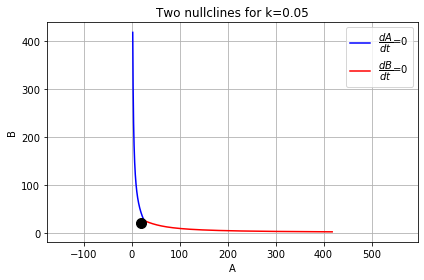

In [48]:
#plotting two nullclines
#print("k= ",k)
k=0.05
fig3, ax3 = plt.subplots(1, 1)
A=  np.linspace(2, 25,  1000)
B=  A
dA_0 = (g+(k*g-d)*A-k*d*np.power(A,2))/(k*d*A) #null cline dA/dt = 0, here B = f(A) f as defined in the line
dB_0 = (g+(k*g-d)*B-k*d*np.power(B,2))/(k*d*B) #null cline dB/dt = 0, here A = g(B) g as defined in the line
ax3.plot(A, dA_0, 'b-', label='$\dfrac{dA}{dt}$=0')
ax3.plot(dB_0, B, 'r-', label='$\dfrac{dB}{dt}$=0')
ax3.plot(equilibria[0],equilibria[1],'k',marker='o',markersize=10)
plt.legend(loc='best')
plt.xlabel('A')
plt.ylabel('B')
plt.title('Two nullclines for k={}'.format(k))
plt.grid()
plt.axis('equal')
plt.tight_layout()
# plt.savefig('challenge_4.png')
plt.show()

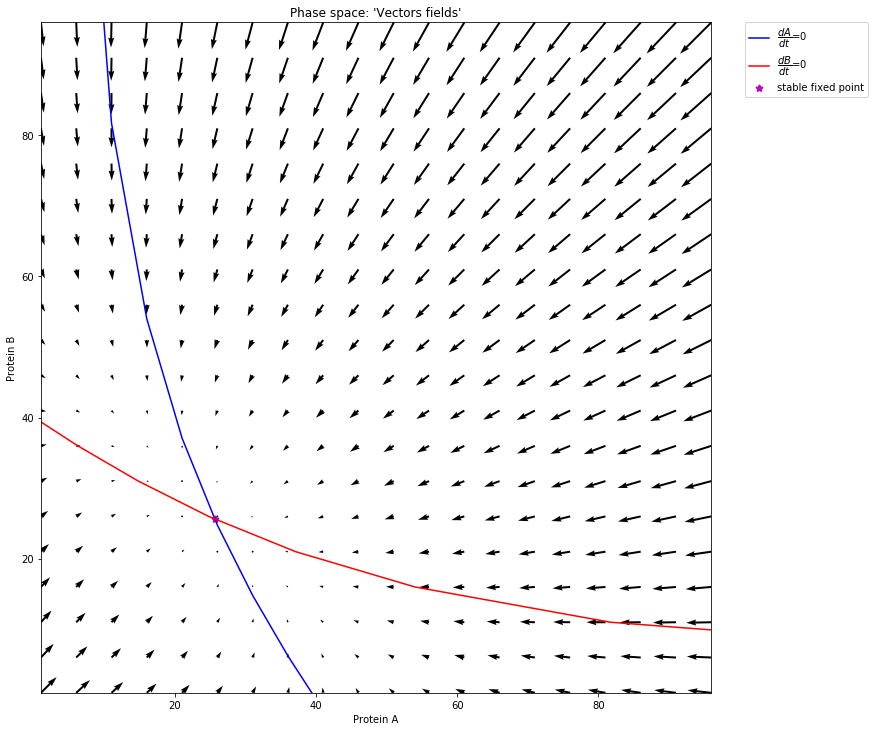

In [27]:
k = 0.05
x = np.arange(1,100,5)
y = np.arange(1,100,5)

X,Y = np.meshgrid(x,y)

u = g/(1+k*Y/(1+k*X))-d*X 
v = g/(1+k*X/(1+k*Y))-d*Y
A = x
B = y
dA_0 = (g+(k*g-d)*A-k*d*np.power(A,2))/(k*d*A) #null cline dA/dt = 0, here B = f(A) f as defined in the line
dB_0 = (g+(k*g-d)*B-k*d*np.power(B,2))/(k*d*B) #null cline dB/dt = 0, here A = g(B) g as defined in the line
fig, ax = plt.subplots(figsize=(12,12))

ax.quiver(X,Y,u,v)
ax.plot(A, dA_0, 'b-', label='$\dfrac{dA}{dt}$=0')
ax.plot(dB_0, B, 'r-', label='$\dfrac{dB}{dt}$=0')
ax.scatter(((k*g-d)+np.sqrt(np.power(k*g+d,2)+4*k*g*d))/(4*k*d), ((k*g-d)+np.sqrt(np.power(k*g+d,2)+4*k*g*d))/(4*k*d), marker='*', color='m',linewidth=2, label='stable fixed point')
ax.axis([x[0],x[-1],y[0],y[-1]])
ax.set_aspect('equal')
ax.set_xlabel("Protein A")
ax.set_ylabel("Protein B")  
ax.set_title("Phase space: 'Vectors fields'")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.tight_layout()

plt.show()

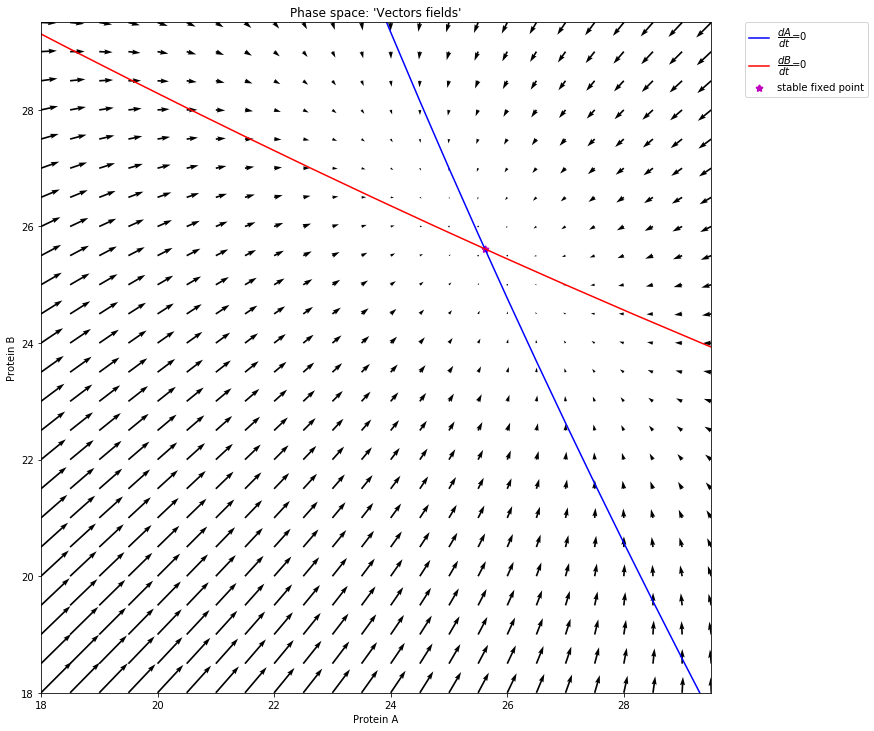

In [28]:
k = 0.05
x = np.arange(18,30,0.5)
y = np.arange(18,30,0.5)

X,Y = np.meshgrid(x,y)

u = g/(1+k*Y/(1+k*X))-d*X 
v = g/(1+k*X/(1+k*Y))-d*Y
A = x
B = y
dA_0 = (g+(k*g-d)*A-k*d*np.power(A,2))/(k*d*A) #null cline dA/dt = 0, here B = f(A) f as defined in the line
dB_0 = (g+(k*g-d)*B-k*d*np.power(B,2))/(k*d*B) #null cline dB/dt = 0, here A = g(B) g as defined in the line
fig, ax = plt.subplots(figsize=(12,12))

ax.quiver(X,Y,u,v)
ax.plot(A, dA_0, 'b-', label='$\dfrac{dA}{dt}$=0')
ax.plot(dB_0, B, 'r-', label='$\dfrac{dB}{dt}$=0')
ax.scatter(((k*g-d)+np.sqrt(np.power(k*g+d,2)+4*k*g*d))/(4*k*d), ((k*g-d)+np.sqrt(np.power(k*g+d,2)+4*k*g*d))/(4*k*d), marker='*', color='m',linewidth=2, label='stable fixed point')
ax.axis([x[0],x[-1],y[0],y[-1]])
ax.set_aspect('equal')
ax.set_xlabel("Protein A")
ax.set_ylabel("Protein B")  
ax.set_title("Phase space: 'Vectors fields'")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.tight_layout()

plt.show()

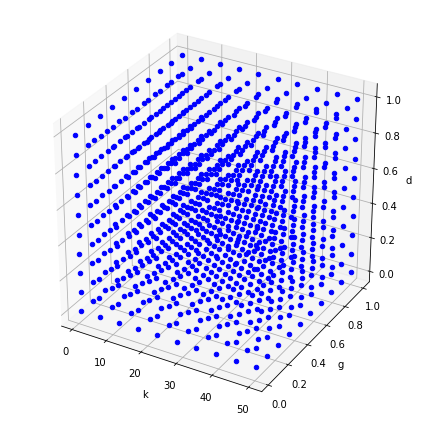

Red: unstable fixed point
Blue: stable fixed point
Yellow: saddle node


In [10]:
from scipy import linalg
from mpl_toolkits.mplot3d import Axes3D
k=np.linspace(0.5, 50,  10)
g=np.linspace(0.01, 1,  10)
d=np.linspace(0.01, 1,  10)
# alpha0=0.2
# alpha1=0.01
# k=[alpha0/alpha1]
# g=[0.2]
# d=[0.005]

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
for i in range(len(k)):
    for j in range(len(g)):
        for l in range(len(d)):
            A = ((k[i]*g[j]-d[l])+np.sqrt(np.power(k[i]*g[j]+d[l],2)+4*k[i]*g[j]*d[l]))/(4*k[i]*d[l])
            J = np.array([[ g[j]*np.power(k[i],2)*A/np.power(1+2*k[i]*A,2)-d[l],g[j]*(-k[i]-np.power(k[i],2)*A)/np.power(1+2*k[i]*A,2)],[g[j]*(-k[i]-np.power(k[i],2)*A)/np.power(1+2*k[i]*A,2),g[j]*np.power(k[i],2)*A/np.power(1+2*k[i]*A,2)-d[l]]])
            lambda1, lambda2 = linalg.eigvals(J)
            if lambda1>0 and lambda2>0:
                print([k[i], g[j], d[l]])
                ax.scatter(k[i], g[j], d[l],color='r',label='unstable fixed point')
            elif lambda1<0 and lambda2<0:
                ax.scatter(k[i], g[j], d[l],color='b',label='stable fixed point')
            else:
                ax.scatter(k[i], g[j], d[l],color='y',label='saddle node')
                print([lambda1, lambda2])
                X0 = [np.float(k[i]),np.float(g[j]),np.float(d[l])]
                print(X0)
ax.set_xlabel("k")
ax.set_ylabel("g")  
ax.set_zlabel("d")  
plt.tight_layout()
plt.show()
print("Red: unstable fixed point")
print("Blue: stable fixed point")
print("Yellow: saddle node")

In [11]:
from scipy import linalg
from mpl_toolkits.mplot3d import Axes3D
k=np.linspace(0.005, 50,  10)
g=np.linspace(0.01, 1,  100)
d=np.linspace(0.01, 1,  100)
t =0
for i in range(len(k)):
    for j in range(len(g)):
        for l in range(len(d)):
            A = ((k[i]*g[j]-d[l])+np.sqrt(np.power(k[i]*g[j]+d[l],2)+4*k[i]*g[j]*d[l]))/(4*k[i]*d[l])
            J = np.array([[ g[j]*np.power(k[i],2)*A/np.power(1+2*k[i]*A,2)-d[l],g[j]*(-k[i]-np.power(k[i],2)*A)/np.power(1+2*k[i]*A,2)],[g[j]*(-k[i]-np.power(k[i],2)*A)/np.power(1+2*k[i]*A,2),g[j]*np.power(k[i],2)*A/np.power(1+2*k[i]*A,2)-d[l]]])
            lambda1, lambda2 = linalg.eigvals(J)
            if lambda1>=0 or lambda2>=0:
                ax.scatter(k[i], g[j], d[l],color='b',label='stable fixed point')
                print([lambda1, lambda2])
                X0 = [np.float(k[i]),np.float(g[j]),np.float(d[l])]
                print(X0)
                t =1
                break
if t == 0:
    print("For all parameters, the fixed point is stable")

For all parameters, the fixed point is stable
